# Duplicates in List

1. Functions to remove duplicates, four methods
2. Probability of duplicates in n-length list sampling randomly from k-length set

In [504]:
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict
from functools import partial
import timeit
import time
from pprint import pprint

%matplotlib inline

In [212]:
fac = np.math.factorial
sqrt = np.math.sqrt

## 1. Functions to Remove Duplicates

Six different ways to do it:

1. Create an empty set, iterate through a slice of the list, check to see if value is in the set, delete from list if so and add to set if not (order preserved, keeps first of duplicates)
1. Create an empty set, iterate through list, check to see if value is in the set, add to set and append to list_out if not (order preserved, keeps first of duplicates)
1. Same as above, but skip creation of set and check list_out for membership instead (order preserved, keeps first of duplicates)
1. Create an empty set, iterate through a slice of the list in reverse, check to see if value is in the set, deletes from list if so and adds to set if not (order preserved, keeps last of duplicates)
1. Create an empty set, iterate through list, check to see if value is in the set, add index to del_indices list if so and add value to set if not, iterate through del_indices list and delete values from list (order preserved, keeps first of duplicates)
1. Turn list into set and back into list (order not preserved, baseline method for speed comparison)

In [3]:
def rm_dupes(list_in):
    '''Iterates through slice, deletes dupes as found'''
    values = set()
    offset = 0
    for ix, val in enumerate(list_in[:]):
        if val in values:
            del list_in[ix - offset]
            offset += 1
        else:
            values.add(val)
    return list_in

In [266]:
def rm_dupes_copy(list_in):
    '''Same as rm_dupes() but appends non-dupes to list_out instead of del'''
    values = set()
    offset = 0
    list_out = []
    for ix, val in enumerate(list_in):
        if val not in values:
            values.add(val)
            list_out.append(val)
    return list_out

In [262]:
def rm_dupes_no_set(list_in):
    '''Same again, but checks for membership in list_out instead of set'''
    offset = 0
    list_out = []
    for ix, val in enumerate(list_in):
        if val not in list_out:
            list_out.append(val)
    return list_out

In [4]:
def rm_dupes_rev(list_in):
    '''Iterates through slice in reverse, deletes dupes as found'''
    values = set()
    l = len(list_in)
    for ix, val in enumerate(list_in[::-1]):
        if val in values:
            del list_in[l - 1 - ix]
        else:
            values.add(val)
    return list_in

In [5]:
def rm_dupes_batch(list_in):
    '''Creates list of dupe indices, then removes in second loop'''
    values = set()
    del_indices = []
    for ix, val in enumerate(list_in):
        if val in values:
            del_indices.append(ix)
        else:
            values.add(val)
    while del_indices:
        del list_in[del_indices.pop()]
    return list_in

In [257]:
def rm_dupes_baseline(list_in):
    '''Simplest/fastest way to do it, does NOT preserve order'''
    return list(set(list_in))

#### Helper Functions

In [609]:
def list_generator(n, k, return_list=True):
    '''Generates random members of n-length array from k-length set'''
    arr = np.random.randint(0, k, n)
    if return_list:
        return list(arr)
    else:
        return arr

In [369]:
def test_deleters(n, k, functions, labels):
    '''Creates random array and tests each of the duplicate removers'''

    test_list = list_generator(n, k)
    test_set = set(test_list)
    
    print("List:", test_list)

    i = 0
    for label, func in zip(labels, functions):
        i += 1
        print("\nMethod {} - {}".format(i, label))
        res = func(test_list[:])
        print(res)
        print("Dupes removed:", test_set == set(res))

In [370]:
functions = [
    rm_dupes, 
    rm_dupes_copy,
    rm_dupes_no_set,
    rm_dupes_rev, 
    rm_dupes_batch, 
    rm_dupes_baseline
]
labels = [
    "iterate through slice & delete (leaves first dupes)",
    "iterate through list & append (leaves first dupes)",
    "iterate through list & append, no set (leaves first dupes)",
    "iterate in reverse (leaves last dupes)",
    "make list of dupe indices then delete (leaves first dupes)",
    "list to set to list (baseline for speed, does not preserve order)"
]

### Testing All Functions

In [371]:
test_deleters(20,10, functions, labels)

List: [1, 8, 1, 5, 9, 5, 6, 2, 4, 5, 4, 2, 7, 2, 5, 2, 3, 5, 4, 1]

Method 1 - iterate through slice & delete (leaves first dupes)
[1, 8, 5, 9, 6, 2, 4, 7, 3]
Dupes removed: True

Method 2 - iterate through list & append (leaves first dupes)
[1, 8, 5, 9, 6, 2, 4, 7, 3]
Dupes removed: True

Method 3 - iterate through list & append, no set (leaves first dupes)
[1, 8, 5, 9, 6, 2, 4, 7, 3]
Dupes removed: True

Method 4 - iterate in reverse (leaves last dupes)
[8, 9, 6, 7, 2, 3, 5, 4, 1]
Dupes removed: True

Method 5 - make list of dupe indices then delete (leaves first dupes)
[1, 8, 5, 9, 6, 2, 4, 7, 3]
Dupes removed: True

Method 6 - list to set to list (baseline for speed, does not preserve order)
[1, 2, 3, 4, 5, 6, 7, 8, 9]
Dupes removed: True


### Timing

In [635]:
def speed_generator(print_list=False):
    n = int(input("n: ").strip())
    k = int(input("k: ").strip())
    test_list = list_generator(n, k)
    print("Length:", len(test_list))
    print("Duplicates:", len(test_list) - len(set(test_list)))
    if print_list:
        print(test_list)
    return test_list

In [645]:
test_list = speed_generator()

n: 1000
k: 10000
Length: 1000
Duplicates: 52


In [639]:
%%timeit
rm_dupes(test_list[:])

22 µs ± 902 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [483]:
%%timeit
rm_dupes_copy(test_list[:])

24.2 ms ± 2.39 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [482]:
%%timeit
rm_dupes_no_set(test_list[:])

13.3 s ± 944 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [484]:
%%timeit
rm_dupes_rev(test_list[:])

400 ms ± 37.2 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [485]:
%%timeit
rm_dupes_batch(test_list[:])

53.6 ms ± 4.46 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [486]:
%%timeit
rm_dupes_baseline(test_list[:])

10.3 ms ± 1.65 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)


#### Results recorded manually in dictionary:

In [251]:
results = {
    # n = 1000, k = 100, 500, 1000, 5000, 10000
    'n1000': {
        'fwd': (0.320, 0.314, 0.299, 0.257),
        'fwc': (0.151, 0.238, 0.297 ,0.317),
        'fns': (1.250, 5.07, 8.15 ,11.9),
        'rev': (0.261, 0.281, 0.249 ,0.227),
        'bat': (0.413, 0.389, 0.294 ,0.282),
        'set': (0.0578, 0.0744, 0.078, 0.0806)        
    },
    # n = 100, k = 10, 50, 100, 500, 1000
    'n100': {
        'fwd': (0.0266, 0.0248, 0.0219, 0.025, 0.0231),
        'fwc': (0.0151, 0.0212, 0.0228, 0.0329, 0.0361),
        'fns': (0.0247, 0.0561, 0.0889, 0.131, 0.132),
        'rev': (0.0258, 0.0229, 0.0222, 0.0275, 0.0261),
        'bat': (0.0459, 0.0369, 0.0382, 0.0332, 0.0308),
        'set': (0.00698, 0.00704, 0.00672, 0.0079, 0.00818)        
    },
    # n = 10000, k = 1000, 5000, 10000, 50000, 100000
    'n10000': {
        'fwd': (),
        'fwc': (),
        'fns': (),
        'rev': (),
        'bat': (),
        'set': ()        
    },
    # n = 100000, k = 10000, 50000, 100000, 500000, 1000000
    'n100000': {
        'fwd': (),
        'fwc': (),
        'fns': (),
        'rev': (),
        'bat': (),
        'set': ()        
    }
}

#### Now wait a sec...

This is Python, not Excel. Why enter manually when you can automate!? Besides, the above method is averaging loops over the *same randomly-generated list*. I'm curious to test on a different list every loop. So let's try a different approach...

In [497]:
def time_functions(functions, n_vals, k_mults=None, loops=10):
    '''
    Times each function on cartensian product of n_vals and k_mults, averages
    time over all loops, generates a new list for each loop, returns results
    as a dictionary.
    ---
    IN
    n_vals: single value n (int) or iterable of n values
    k_mults: iterable of constants to set k in terms of n, e.g. k = n * k_mult;
        if None, will set to 1 (e.g. n = k)
    functions: list of duplicate remover functions to time (list)
    loops: number of loops to run per n_val/k_mult/function, default 10 (int)
    OUT
    results: dictionary of average times (in ms) in format:
        {
            n_val: {
                func.__name__: (time_k0, time_k1 ... time_kn)
            }
        }
    '''
    
    assert len(functions) > 0, "No functions to test"
    assert n_vals, "No n values given"
    
    if isinstance(n_vals, int):
        n_vals = [n_vals]
    if not k_mults:
        k_mults = [1]
    if k_mults and isinstance(k_mults, int):
        k_mults = [k_mults]

    results = {} 
    
    print("Looping {}x per function".format(loops))
    big_then = time.perf_counter()
    
    for n in n_vals:
        n_key = 'n' + str(n)
        results[n_key] = defaultdict(list)       
        for k_mult in k_mults:
            k = int(n * k_mult)            
            print("Testing n = {}, k = {}".format(n, k, loops))
            times = defaultdict(list)
            for _ in range(loops):
                # generate new list for each loop
                test_list = list_generator(n, k)
                # print("Test list length:", len(test_list))
                # print("Duplicates:", len(test_list) - len(set(test_list)))
                for func in functions:
                    then = time.perf_counter()
                    res = func(test_list[:])
                    now = time.perf_counter()
                    times[func.__name__].append((now - then) * 1e3)
                # pprint(times)
            for k, v in times.items():
                results[n_key][k].append(sum(v)/len(v)) 
                
    big_now = time.perf_counter()
    print("Total time: {:.3f}s".format(big_now - big_then))
                
    return results

Because the process of checking `list_out` for value membership is O(n) instead of O(1) as with a set, and it must be checked each iteration, the function that uses this method is exponentially slower as n increases and the number of duplicates lowers (k increases). Using this function with n = 100,000 and k = 10,000 takes ~13 seconds (as opposed to ~1.5 seconds for the first and ~0.025 for the second!), so I have omitted n = 100,000 from the first test sequence, and omitted the third function from the second test sequence.

In [499]:
n_values_short = (100, 1000, 10000)
k_mults = (0.1, 0.5, 1, 5, 10)
results_auto = time_functions(functions, n_values_short, k_mults, 100)

Looping 100x per function
Testing n = 100, k = 10
Testing n = 100, k = 50
Testing n = 100, k = 100
Testing n = 100, k = 500
Testing n = 100, k = 1000
Testing n = 1000, k = 100
Testing n = 1000, k = 500
Testing n = 1000, k = 1000
Testing n = 1000, k = 5000
Testing n = 1000, k = 10000
Testing n = 10000, k = 1000
Testing n = 10000, k = 5000
Testing n = 10000, k = 10000
Testing n = 10000, k = 50000
Testing n = 10000, k = 100000
Total time: 375.626s


In [501]:
pprint(results_auto)

{'n100': defaultdict(<class 'list'>,
                     {'rm_dupes': [0.03700245026266202,
                                   0.029170651105232537,
                                   0.03385078045539558,
                                   0.03518986020935699,
                                   0.03362493895110674],
                      'rm_dupes_baseline': [0.008376781042898074,
                                            0.008208780636778101,
                                            0.008735290030017495,
                                            0.009694310138002038,
                                            0.009490910597378388],
                      'rm_dupes_batch': [0.04516823202720843,
                                         0.03598431925638579,
                                         0.03424754962907173,
                                         0.023411069851135835,
                                         0.02291097931447439],
                      'rm_dupes_copy':

In [ ]:
functions_short = [
    rm_dupes, 
    rm_dupes_copy,
    rm_dupes_rev, 
    rm_dupes_batch, 
    rm_dupes_baseline
]

In [500]:
n_values = (100, 1000, 10000, 100000)
results_auto_short = time_functions(functions_short, n_values, k_mults, 100)

Looping 100x per function
Testing n = 100, k = 10
Testing n = 100, k = 50
Testing n = 100, k = 100
Testing n = 100, k = 500
Testing n = 100, k = 1000
Testing n = 1000, k = 100
Testing n = 1000, k = 500
Testing n = 1000, k = 1000
Testing n = 1000, k = 5000
Testing n = 1000, k = 10000
Testing n = 10000, k = 1000
Testing n = 10000, k = 5000
Testing n = 10000, k = 10000
Testing n = 10000, k = 50000
Testing n = 10000, k = 100000
Testing n = 100000, k = 10000
Testing n = 100000, k = 50000
Testing n = 100000, k = 100000
Testing n = 100000, k = 500000
Testing n = 100000, k = 1000000
Total time: 604.295s


In [502]:
pprint(results_auto_short)

{'n100': defaultdict(<class 'list'>,
                     {'rm_dupes': [0.03813214963884093,
                                   0.034772500075632706,
                                   0.028245699795661494,
                                   0.03349039034219459,
                                   0.03094522951869294],
                      'rm_dupes_baseline': [0.0101253401953727,
                                            0.012331660836935043,
                                            0.008139180135913193,
                                            0.011329090048093349,
                                            0.012206178944325075],
                      'rm_dupes_batch': [0.0509025102655869,
                                         0.04300442029489204,
                                         0.03052542990189977,
                                         0.02766920006251894,
                                         0.02878149040043354],
                      'rm_dupes_copy': [0

### Time Viz

In [556]:
[int(100*k_mult) for k_mult in k_mults]

[10, 50, 100, 500, 1000]

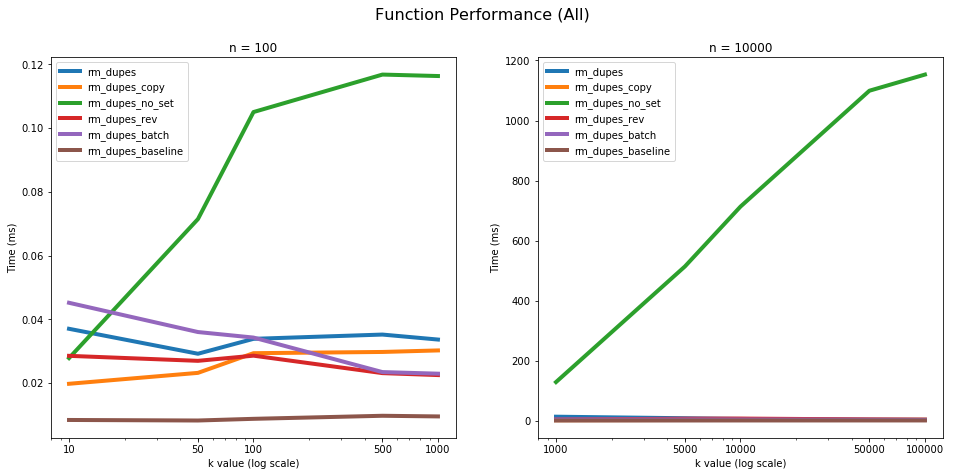

In [593]:
fig, ax = plt.subplots(1, 2, figsize=(16,7))
fig.suptitle("Function Performance (All)", fontsize=16)
# print("ax shape:", ax.shape)

# plot n = 100, 10000 with all functions
for ix, n in enumerate([100,10000]):
    ticks = [int(n*km) for km in k_mults]
    for func in functions:
        name = func.__name__
        ax[ix].plot(
            ticks, 
            results_auto['n' + str(n)][name], 
            label=name,
            linewidth=4
        )
    ax[ix].set_title("n = {}".format(n))
    ax[ix].semilogx()
    ax[ix].set_xticks(ticks)
    ax[ix].set_xticklabels(ticks)
    ax[ix].set_xlabel("k value (log scale)")
    ax[ix].set_ylabel("Time (ms)")
    ax[ix].legend();

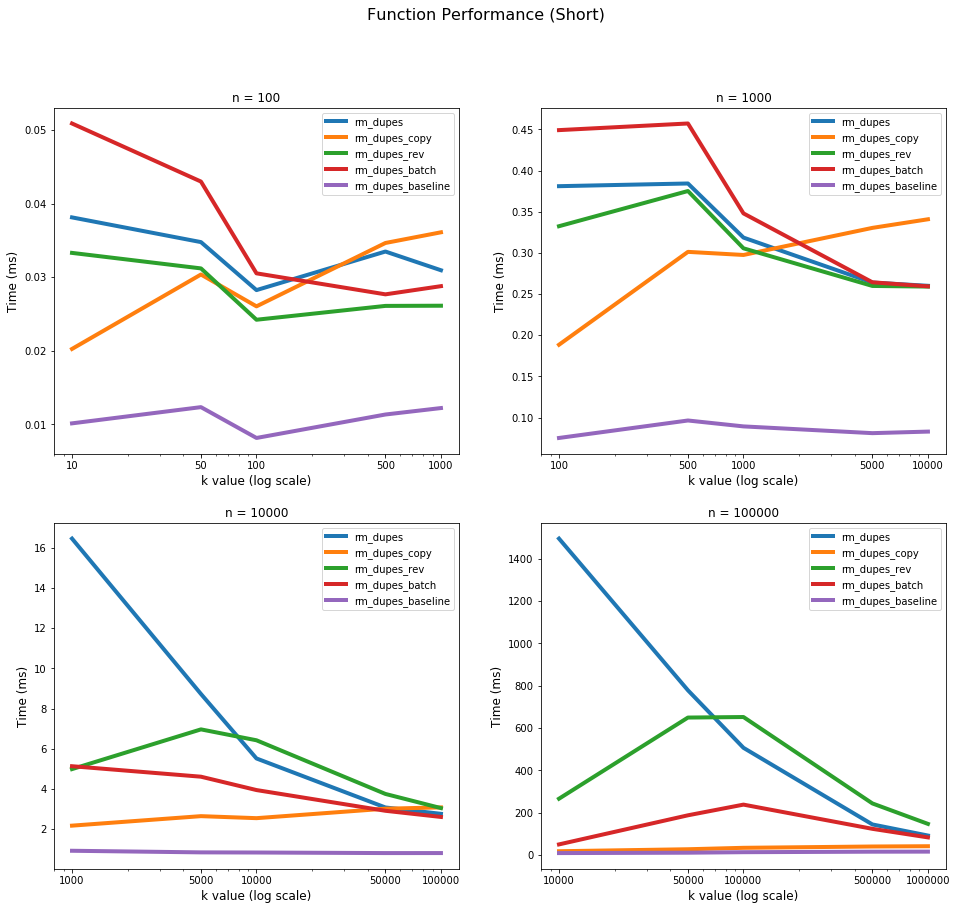

In [596]:
fig, ax = plt.subplots(2, 2, figsize=(16,14))
fig.suptitle("Function Performance (Short)", fontsize=16)
# print("ax shape:", ax.shape)

# plot n = 100, 10000 with all functions
for ix, n in enumerate(n_values):
    x = ix % 2
    y = ix // 2
    ticks = [int(n*km) for km in k_mults]
    for func in functions_short:
        name = func.__name__
        ax[y][x].plot(
            ticks, 
            results_auto_short['n' + str(n)][name], 
            label=name,
            linewidth=4
        )
    ax[y][x].set_title("n = {}".format(n))
    ax[y][x].semilogx()
    ax[y][x].set_xticks(ticks)
    ax[y][x].set_xticklabels(ticks)
    ax[y][x].set_xlabel("k value (log scale)", fontsize=12)
    ax[y][x].set_ylabel("Time (ms)", fontsize=12)
    ax[y][x].legend();

## 2. Duplicates in Randomly-Generated Lists

In [709]:
def check_duplicates(n, k, loops, verbose=False):
    dupe_ratios = np.array([])
    unique_array_count = 0
    for _ in range(loops):
        test_arr = list_generator(n, k, return_list=False)
        dr = (test_arr.shape[0] - len(set(test_arr))) / test_arr.shape[0]
        dupe_ratios = np.append(dupe_ratios, dr)
        if dr == 0:
            unique_array_count += 1
    assert loops == dupe_ratios.shape[0], "WTF?"
    if verbose:
        print("n = {}, k = {}".format(n, k))
        error = 1.96 * dupe_ratios.std() / sqrt(dupe_ratios.shape[0])
        print("Ratio of duplicate values: {:.6f} ±{:.6f} ({} loops)"
              .format(dupe_ratios.mean(), error, loops)
             )
        print("Unique arrays:", unique_array_count)
        print("Ratio of unique arrays:", unique_array_count / loops)
    return dupe_ratios

In [710]:
drs = check_duplicates(10000, 8000, 10000, verbose=True)

n = 10000, k = 8000
Ratio of duplicate values: 0.429193 ±0.000056 (10000 loops)
Unique arrays: 0
Ratio of unique arrays: 0.0


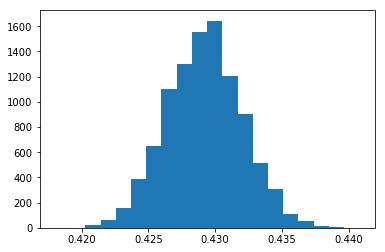

In [711]:
plt.hist(drs, bins=20);

In [713]:
k_vals = np.array([n*200 for n in range(1,5)] + [n*1000 for n in range(1,11)])

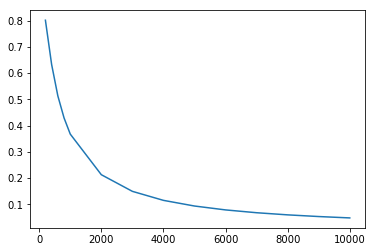

In [714]:
plt.plot(k_vals, [check_duplicates(1000, k, 10000).mean() for k in k_vals]);

In [238]:
def fac_plus(x, stop=None):
    if x == 0:
        return 1
    elif x == stop:
        return x
    else:
        return x * fac_plus(x-1, stop=stop)